In [1]:
#Importing neccssary modules. yfinance allows us to download and use stock market data from yahoo Finance.
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Enter the total investment amount and the start date. Inputs given are 10,000 starting from 13-01-2021 till today.
Amount = int(input('Enter Amount to Invest($)'))
start = input('Enter Start Date of Investment(DD-MM-YYYY) ').split('-')
start_date = datetime.date(int(start[2]), int(start[1]), int(start[0]))
end_date = datetime.datetime.today()

Enter Amount to Invest($)10000
Enter Start Date of Investment(DD-MM-YYYY) 13-01-2021


In [3]:
print(start_date,end_date)

2021-01-13 2022-01-15 16:11:34.629595


In [4]:
#Downloading Amazon and Apple dataset from Yahoo Finance API
Amazon_data = yf.download('AMZN', start= start_date, end= end_date)
Apple_data = yf.download('AAPL', start= start_date, end= end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
Amazon_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-12,3120.000000,3142.139893,3086.000000,3120.830078,3120.830078,3514600
2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200
2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900
2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4244000
2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100


In [6]:
#Reseting the index.
amzn = pd.DataFrame(Amazon_data)
aapl = pd.DataFrame(Apple_data)
amzn.reset_index(inplace=True)
aapl.reset_index(inplace=True)

In [7]:
#Dropping other coloumns.We just need open and close column.
amzn.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)
aapl.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)

In [8]:
#Calculating overnight return % by taking (current Open price - Close price(previous day))/Close price * 100
#shift function shifts the ethire columns by a amount specified.
amzn['Overnight Return %'] = ((amzn['Open'].shift(-1) - amzn['Close']).shift(1)/amzn['Close'])*100
aapl['Overnight Return %'] = ((aapl['Open'].shift(-1) - aapl['Close']).shift(1)/aapl['Close'])*100 

In [9]:
amzn

,Date,Open,Close,Overnight Return %
0,2021-01-12,3120.000000,3120.830078,NaN
1,2021-01-13,3128.439941,3165.889893,0.240370
2,2021-01-14,3167.520020,3127.469971,0.052123
3,2021-01-15,3123.020020,3104.250000,-0.143350
4,2021-01-19,3107.000000,3120.760010,0.088120
...,...,...,...,...
251,2022-01-10,3211.709961,3229.719971,-1.218995
252,2022-01-11,3230.000000,3307.239990,0.008467
253,2022-01-12,3331.500000,3304.139893,0.734231
254,2022-01-13,3305.010010,3224.280029,0.026986


In [10]:
#Checking for null values. Only one null vaue in both the data set.
print(aapl.isnull().sum())
print(amzn.isnull().sum())
#Filling null values with zero
amzn['Overnight Return %'] = amzn['Overnight Return %'].fillna(0)
aapl['Overnight Return %'] = aapl['Overnight Return %'].fillna(0)

Date                  0
Open                  0
Close                 0
Overnight Return %    1
dtype: int64
Date                  0
Open                  0
Close                 0
Overnight Return %    1
dtype: int64


In [11]:
#Checking the return of two strategies in time periods of 1 month, 3month ,6month and 1 year.
#Amazon_overnight stores the return values using day and night strategy. 
#Amazon_long stores the return values using Long hold strategy.
amzn_profit=0
Amazon_overnight=[]
Amazon_long=[]
for n in [30,90,180,len(amzn)]:
    for i in range(1,n):
        amzn_pnl =  (amzn['Overnight Return %'][i]/100)*Amount
        amzn_profit = amzn_profit + amzn_pnl
        
    overnight_pnl=((amzn_profit/Amount)*100).round(3)
    Amazon_overnight.append(overnight_pnl)
    print('Total P&L % using overnight strategy after',n,'days :',overnight_pnl)
    
    Long_hold_profit=((amzn['Close'][n-1]-amzn['Open'][0])/amzn['Open'][0])*Amount
    Long_hold_pnl=((Long_hold_profit/Amount)*100).round(3)
    Amazon_long.append(Long_hold_pnl)
    print("Total P&L % using Long Hold Strategy after",n,"days :", Long_hold_pnl)
    

Total P&L % using overnight strategy after 30 days : 2.517
Total P&L % using Long Hold Strategy after 30 days : 1.267
Total P&L % using overnight strategy after 90 days : 18.568
Total P&L % using Long Hold Strategy after 90 days : 4.092
Total P&L % using overnight strategy after 180 days : 32.053
Total P&L % using Long Hold Strategy after 180 days : 6.281
Total P&L % using overnight strategy after 256 days : 48.975
Total P&L % using Long Hold Strategy after 256 days : 3.935


In [12]:
#Apple_overnight stores the return values using day and night strategy. 
#Apple_long stores the return values using Long hold strategy.
aapl_profit=0
Apple_overnight=[]
Apple_long=[]

for n in [30,90,180,len(aapl)]:
    for i in range(1,n):
        aapl_pnl =  (aapl['Overnight Return %'][i]/100)*Amount
        aapl_profit = aapl_profit + aapl_pnl
        
    overnight_pnl=((aapl_profit/Amount)*100).round(3)
    Apple_overnight.append(overnight_pnl)
    print('Total P&L % using overnight strategy after',n,'days :', overnight_pnl)
    
    Long_hold_profit=((aapl['Close'][n-1]-aapl['Open'][0])/aapl['Open'][0])*Amount
    Long_hold_pnl=((Long_hold_profit/Amount)*100).round(3)
    Apple_long.append(Long_hold_pnl)
    print("Total P&L % using Long Hold Strategy after",n,"days :", Long_hold_pnl)

Total P&L % using overnight strategy after 30 days : 0.391
Total P&L % using Long Hold Strategy after 30 days : -2.451
Total P&L % using overnight strategy after 90 days : 8.106
Total P&L % using Long Hold Strategy after 90 days : -0.926
Total P&L % using overnight strategy after 180 days : 17.519
Total P&L % using Long Hold Strategy after 180 days : 10.436
Total P&L % using overnight strategy after 256 days : 26.349
Total P&L % using Long Hold Strategy after 256 days : 34.685


In [13]:
#combining all the array into numpy array
A=np.array([Amazon_overnight,Amazon_long,Apple_overnight,Apple_long])

In [14]:
#Converting numpy array to pandas Dataframe
D=pd.DataFrame(data=A.transpose(), index=['1 month','3 month','6 month','1 year'], 
               columns = ['Day & Night Strategy - Amazon','Long hold Strategy - Amazon',
                                                            'Day & Night Strategy - Apple','Long hold strategy - Apple'])

In [15]:
print(D)

         Day & Night Strategy - Amazon  Long hold Strategy - Amazon  \
1 month                          2.517                        1.267   
3 month                         18.568                        4.092   
6 month                         32.053                        6.281   
1 year                          48.975                        3.935   

         Day & Night Strategy - Apple  Long hold strategy - Apple  
1 month                         0.391                      -2.451  
3 month                         8.106                      -0.926  
6 month                        17.519                      10.436  
1 year                         26.349                      34.685  


<AxesSubplot:>

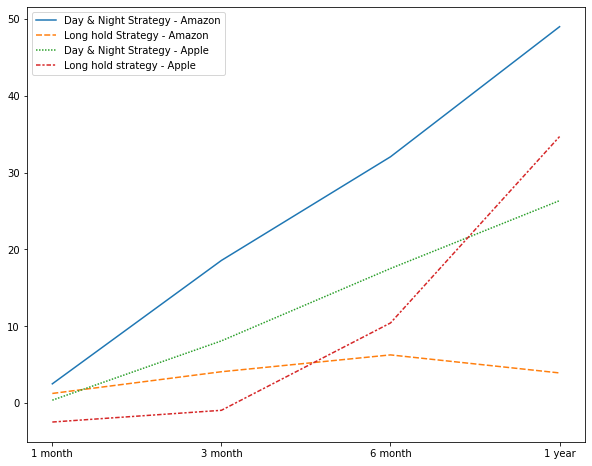

In [16]:
#plotting to get a better visualization
plt.figure(figsize=(10,8))
sns.lineplot(data=D)

Calculate sharpe value

In [17]:
# Taking Adj close values of each day and subracting it with the prior value to obtain the daily return.
#pct_change calculates the percentage change between the current and a prior element
Amazon_data['Daily Return'] = Amazon_data['Adj Close'].pct_change()
Apple_data['Daily Return'] = Apple_data['Adj Close'].pct_change()
# dropping null values
Amazon_data=Amazon_data.dropna()
Apple_data=Apple_data.dropna()

In [18]:
Apple_data

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
1,2021-01-13,128.759995,131.449997,128.490005,130.889999,130.088028,88636800,0.016227
2,2021-01-14,130.800003,131.000000,128.759995,128.910004,128.120163,90221800,-0.015127
3,2021-01-15,128.779999,130.220001,127.000000,127.139999,126.361008,111598500,-0.013731
4,2021-01-19,127.779999,128.710007,126.940002,127.830002,127.046791,90757300,0.005427
5,2021-01-20,128.660004,132.490005,128.550003,132.029999,131.221039,104319500,0.032856
...,...,...,...,...,...,...,...,...
251,2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106606900,0.000116
252,2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300,0.016784
253,2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200,0.002570
254,2022-01-13,175.779999,176.619995,171.789993,172.190002,172.190002,84505800,-0.019028


In [19]:
# Function to calculate the standard deviation. n - Number of observations . 
# square root of varaince is taken to obtain standard deviation
def Deviation(Data):
    n = len(Data)
    Mean = sum(Data) / n
    Deviation = sum([(i - Mean)**2 for i in Data])
    # Calculate Variance & Standard Deviation
    Variance = Deviation / (n - 1)
    SD = Variance**(1/2)
    return SD

In [20]:
#The Sharpe Ratio tells an analyst the return per unit of risk. 
#In other words, how much extra return you will receive per unit of risk that you take on.

#Setting the risk-free rate to zero is not only for simplicity,
#but because any action is inherently risky in some fashion, 
#especially when you consider receiving a reward
def sharpe_ratio(Data, Risk_free_rate=0.0):
    # Calculate Average Daily Return
    Daily_mean_return = sum(Data) / len(Data)
    SD = Deviation(Data)
   
    Daily_sharpe_ratio = (Daily_mean_return - Risk_free_rate) / SD
    # Annualize Daily Sharpe Ratio
    Sharpe_ratio = (252**(1/2)) * Daily_sharpe_ratio
    
    return Sharpe_ratio

In [21]:
amazon_sharpe=sharpe_ratio(Amazon_data['Daily Return'])
print(amazon_sharpe)

0.27758194493668215


In [22]:
apple_sharpe=sharpe_ratio(Apple_data['Daily Return'])
print(apple_sharpe)

1.3299846707897205
